# [Kaggle自行车租赁预测比赛](https://www.kaggle.com/c/bike-sharing-demand)

## 数据加载

    atetime(温度) - hourly date + timestamp  
    season（季节） -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
    holiday（节假日） - whether the day is considered a holiday
    workingday（工作日） - whether the day is neither a weekend nor holiday
    weather（天气） - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    temp（临时） - temperature in Celsius
    atemp - "feels like" temperature in Celsius
    humidity （湿度） - relative humidity
    windspeed（风速） - wind speed
    casual (非注册用户)- number of non-registered user rentals initiated
    registered （注册用户）- number of registered user rentals initiated
    count （总数，也就是我们的目标值）- number of total rentals



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('./train.csv', header=0)
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
df_train.shape

(10886, 12)

In [5]:
# 没有缺省字段
df_train.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

In [6]:
# 对时间序列进行加工
df_train['month'] = pd.DatetimeIndex(df_train.datetime).month
df_train['day'] = pd.DatetimeIndex(df_train.datetime).day
df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour

In [7]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


In [8]:
# 保留原来的数据
df_train_origin = df_train
# 感觉似乎无用的字段处理掉
df_train = df_train.drop(['datetime','casual','registered'], axis = 1)

In [9]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4


In [10]:
df_train.shape

(10886, 12)

## 训练模型

In [11]:
df_train_target = df_train['count'].values
df_train_data = df_train.drop(['count'],axis = 1).values
print('df_train_data shape is ', df_train_data.shape)
print('df_train_target shape is ', df_train_target.shape)

df_train_data shape is  (10886, 11)
df_train_target shape is  (10886,)


## 机器学习算法

1. [支持向量回归](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)
2. [岭回归](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
3. [随机森林回归](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [12]:
from sklearn import linear_model
# from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn import  svm
from sklearn.ensemble import RandomForestRegressor
# from sklearn.learning_curve import learning_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import ShuffleSplit

In [56]:
# 训练街和测试集
rs = ShuffleSplit(n_splits=3, test_size=.25, random_state=0)

print('Ridge')
for train_index, test_index in rs.split(df_train_data):
    svc = linear_model.Ridge().fit(df_train_data[train_index], df_train_target[train_index])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train_index], df_train_target[train_index]),
        svc.score(df_train_data[test_index], df_train_target[test_index])))
    
print('SVM')
for train_index, test_index in rs.split(df_train_data):
    svc = svm.SVR(kernel ='rbf', C = 10, gamma = .001).fit(df_train_data[train_index], df_train_target[train_index])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train_index], df_train_target[train_index]), svc.score(df_train_data[test_index], df_train_target[test_index])))

print('RandomForestRegressor')
for train_index, test_index in rs.split(df_train_data):
    svc = RandomForestRegressor(n_estimators=100).fit(df_train_data[train_index], df_train_target[train_index])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train_index], df_train_target[train_index]), svc.score(df_train_data[test_index], df_train_target[test_index])))

Ridge
train score: 0.337, test score: 0.339

train score: 0.329, test score: 0.365

train score: 0.339, test score: 0.332

SVM
train score: 0.411, test score: 0.406

train score: 0.399, test score: 0.441

train score: 0.410, test score: 0.390

RandomForestRegressor
train score: 0.981, test score: 0.861

train score: 0.982, test score: 0.874

train score: 0.981, test score: 0.871



## 调参

In [62]:
# 使用 GridSearchCV 调参
X = df_train_data
y = df_train_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
tuned_parameters = [{'n_estimators':[10,100,500]}]   
scores = ['r2']
for score in scores:
    clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)
    '''
    '''

## 通过学习曲线，判断是 过拟合还是欠拟合

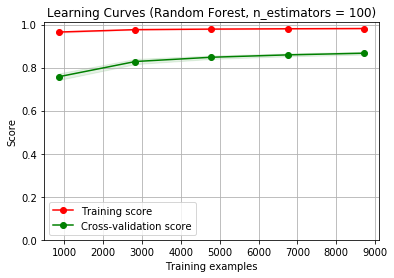

In [64]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forest, n_estimators = 100)"
# cv = cross_validation.ShuffleSplit(df_train_data.shape[0], n_iter=10,test_size=0.2, random_state=0)
cv =  ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(n_estimators = 100)
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

> 间距过大 --> 过拟合

## 缓解过拟合

In [65]:
rs = ShuffleSplit(n_splits=3, test_size=.25, random_state=0)
for train_index, test_index in rs.split(df_train_data):
    svc = RandomForestRegressor(n_estimators = 200, max_features=0.6, max_depth=15).fit(df_train_data[train_index], df_train_target[train_index])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train_index], df_train_target[train_index]), svc.score(df_train_data[test_index], df_train_target[test_index])))

train score: 0.967, test score: 0.861

train score: 0.966, test score: 0.872

train score: 0.966, test score: 0.871



## 数据分析

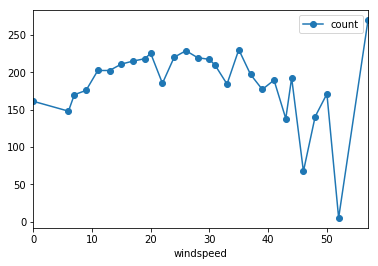

In [66]:
# 风速
df_train_origin.groupby('windspeed').mean().plot(y='count', marker='o')
plt.show()

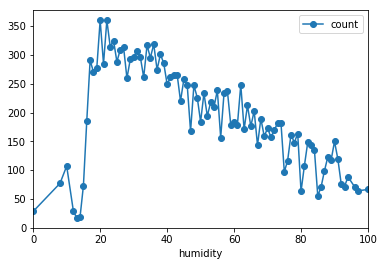

In [68]:
# 湿度
df_train_origin.groupby('humidity').mean().plot(y='count', marker='o')
plt.show()

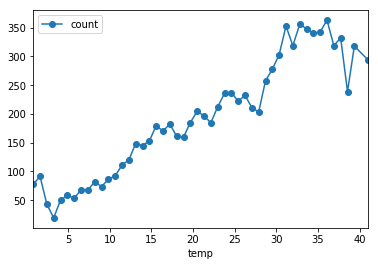

In [69]:
# 温度
df_train_origin.groupby('temp').mean().plot(y='count', marker='o')
plt.show()

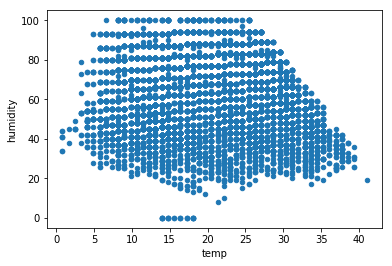

In [70]:
#温度湿度变化
df_train_origin.plot(x='temp', y='humidity', kind='scatter')
plt.show()

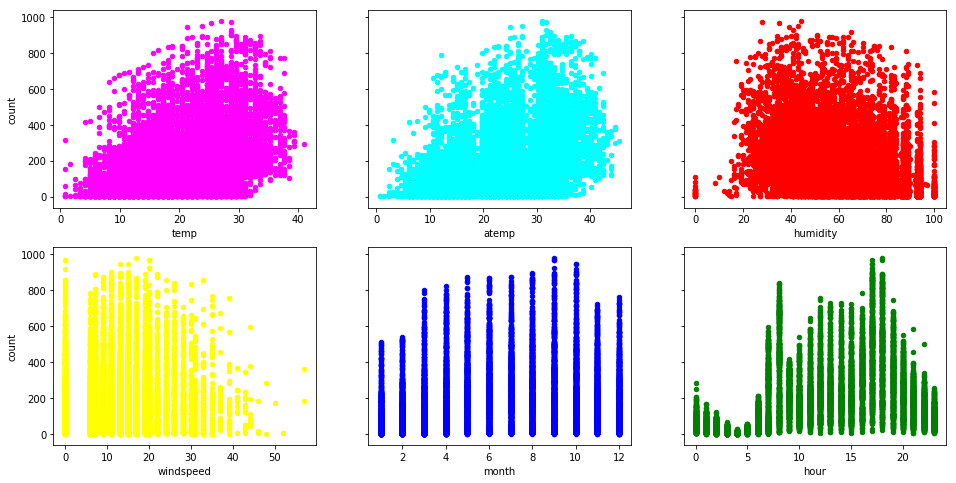

In [72]:
# scatter一下各个维度
fig, axs = plt.subplots(2, 3, sharey=True)
df_train_origin.plot(kind='scatter', x='temp', y='count', ax=axs[0, 0], figsize=(16, 8), color='magenta')
df_train_origin.plot(kind='scatter', x='atemp', y='count', ax=axs[0, 1], color='cyan')
df_train_origin.plot(kind='scatter', x='humidity', y='count', ax=axs[0, 2], color='red')
df_train_origin.plot(kind='scatter', x='windspeed', y='count', ax=axs[1, 0], color='yellow')
df_train_origin.plot(kind='scatter', x='month', y='count', ax=axs[1, 1], color='blue')
df_train_origin.plot(kind='scatter', x='hour', y='count', ax=axs[1, 2], color='green')
plt.show()

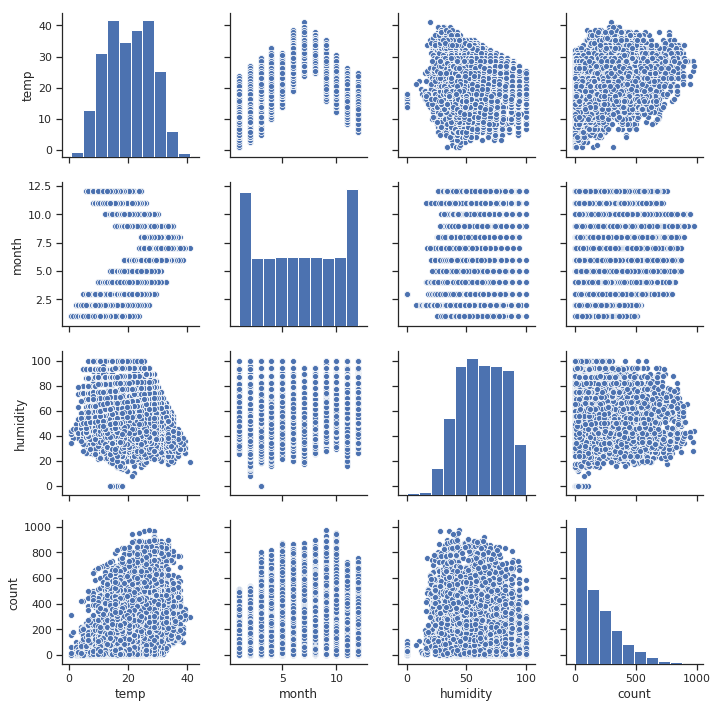

In [17]:
# 使用 seaborn 绘图
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_train_origin[["temp", "month", "humidity", "count"]])

In [15]:
# 来看看相关度咯
corr = df_train_origin[['temp','weather','windspeed','day', 'month', 'hour','count']].corr()
corr

,temp,weather,windspeed,day,month,hour,count
temp,1.000000,-0.055035,-0.017852,0.015551,0.257589,0.145430,0.394454
weather,-0.055035,1.000000,0.007261,-0.007890,0.012144,-0.022740,-0.128655
windspeed,-0.017852,0.007261,1.000000,0.036157,-0.150192,0.146631,0.101369
day,0.015551,-0.007890,0.036157,1.000000,0.001974,0.001132,0.019826
month,0.257589,0.012144,-0.150192,0.001974,1.000000,-0.006818,0.166862
hour,0.145430,-0.022740,0.146631,0.001132,-0.006818,1.000000,0.400601
count,0.394454,-0.128655,0.101369,0.019826,0.166862,0.400601,1.000000


<Figure size 432x288 with 0 Axes>

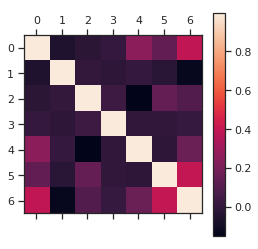

In [16]:
# 用颜色深浅来表示相关度
plt.figure()
plt.matshow(corr)
plt.colorbar()
plt.show()